In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

from sklearn.model_selection import train_test_split

In [180]:
train_data = pd.read_csv('../../datasets/train.csv')
test_data = pd.read_csv('../../datasets/test.csv')

In [181]:
y_train = train_data['label']
X_train = train_data.drop('label', axis = 1)
X_train = X_train / 255.0
X_test = test_data/255.0
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
y_train = y_train.values
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [187]:
X_tr = X_train.reshape(-1,784)
y_tr = y_train.reshape(-1,1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_tr, y_tr, cv = 3)

C:\developer\Anaconda\envs\pytorch\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\developer\Anaconda\envs\pytorch\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\developer\Anaconda\envs\pytorch\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [189]:
X_tr.shape

(42000, 784)

In [ ]:
!cross_val_score

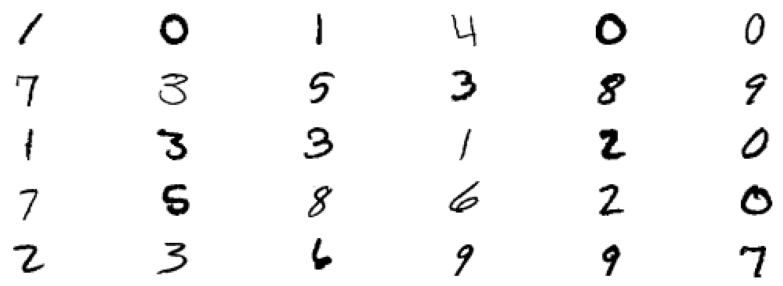

In [163]:
plt.figure(figsize = (15,5))
for ii in range(30):
    plt.subplot(5,6,ii+1)
    plt.imshow(X_train[ii], cmap = plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
plt.show()

In [164]:
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5])
])

In [165]:
batch_size = 64

In [167]:
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)
X_test = torch.from_numpy(X_test)
X_train, X_val,y_train,y_val = train_test_split(X_train, y_train, test_size = 0.2)
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
val_dataset = torch.utils.data.TensorDataset(X_val, y_val)
train_loader = DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True, num_workers = 2)
val_loader = DataLoader(dataset = val_dataset, batch_size = batch_size, shuffle = True, num_workers = 2)

TypeError: expected np.ndarray (got Tensor)

In [170]:
for b,(data, target) in enumerate(train_loader):
    if b >0:
        break
    print(data.shape)

torch.Size([64, 28, 28, 1])


In [171]:
class Flatten(nn.Module):
    def forward(self, x):
        return x.view(x.size(0), -1)  # -1代表除了特殊声明过的以外的全部维度。

In [172]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 32, 3),
            nn.ReLU(inplace = True),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 32, 3),
            nn.ReLU(inplace = True),
            nn.BatchNorm2d(32),
            nn.Dropout(p = 0.4),
            
            nn.Conv2d(32, 64, 3),
            nn.ReLU(inplace = True),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, 3),
            nn.ReLU(inplace = True),
            nn.BatchNorm2d(64),
            nn.Conv2d(64,64,5,padding = 2),
            nn.BatchNorm2d(64),
            nn.Dropout(p = 0.4),
            
            nn.Conv2d(64, 128, 4),
            nn.ReLU(inplace = True),
            nn.BatchNorm2d(128),
            Flatten(),
            nn.Dropout(p = 0.4),
            
            nn.Linear(128 *17 *17, 10)
        )
    def forward(self, x):
        x = x.permute(0,3,1,2)
        return self.model(x)


In [173]:
net = Net()
net

Net(
  (model): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU(inplace=True)
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Dropout(p=0.4, inplace=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (8): ReLU(inplace=True)
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (11): ReLU(inplace=True)
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (14): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): Dropout(p=0.4, inplace=False)
    (16): Conv2d(64, 

In [179]:
criterion  = nn.NLLLoss()
epoches = 10
optimizer = optim.Adam(net.parameters(), lr=0.0015)

train_loss_all = []
train_acc_all = []
for epoch in range(epoches):
    print('Epoch {} / {}:'.format(epoch+1, epoches))
    batch_corrects = 0
    batch_loss = 0.0
    train_num = 0
    for batch_id, (data,target) in enumerate(train_loader):
        data = data.to(torch.float32)
        output = net(data)
        pre_lab = torch.argmax(output, 1)
        loss = criterion(output,target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_loss += loss.item() * data.size(0)
        batch_corrects += torch.sum(pre_lab == target.data)
        train_num += data.size(0)
    train_loss_all.append(batch_loss / train_num)
    train_acc_all.append(batch_corrects.double().item() / train_num)
    print('ACC: {}   Loss:{}'.format(train_acc_all[epoch],train_loss_all[epoch] ))

Epoch 1 / 10:
ACC: 0.56625   Loss:-129956.65495535714
Epoch 2 / 10:
ACC: 0.5714285714285714   Loss:-305567.47529761906
Epoch 3 / 10:


KeyboardInterrupt: 

In [174]:
x = torch.randn(13,2)

In [175]:
x.dtype

torch.float32